# Support vector regression
A Support Vector Regressor (SVR) is a powerful machine learning algorithm, an extension of Support Vector Machines (SVMs), used for regression tasks (predicting continuous values) by finding a "best-fit" hyperplane that tolerates a certain amount of error (epsilon) while maximizing the margin, focusing only on critical data points (support vectors) outside this margin to avoid overfitting and capture underlying trends. It works by defining an epsilon-insensitive tube around the regression line, penalizing only points outside this tube, making it great for complex, non-linear data.  

> Note: SVC is prerequisite of this, don't try to do this before SVC

![svr](https://cdn.educba.com/academy/wp-content/uploads/2020/01/Support-Vector-Regression.jpg)

## The equations
The equation of Hyperplane is same as that of SVC, i.e.,
$$ w'x + b = 0 $$

However, the equations of marginal plains differ:

$$ w'x + b + ε = 0 $$
$$ w'x + b - ε = 0 $$

Here, **ε** is the *distance between the hyperplane and the marginal plain*. It is basically a hyperparameter that basically defined the range of error that can be tolerated and doesn't need to penalise.

## Cost function
The cost function is also almost same as that of SVC, just some things are different here.

$$ |w|/2 + C \sum^{n}_{i=1} ζᵢ $$
$$ The\ cost\ function\ reamins\ same\ but\ some\ things\ are\ different\ here $$
$$ here\ \sum^{n}_{i=1} ζᵢ = summation\ of\ difference\ between\ marginal\ plain\ and\ the\ points\ beyond\ marginal\ plain. $$

Here, the constraint will change, this will be the constraint:

$$ |yᵢ - wᵢxᵢ| <= ε\ \\ for\ points\ within\ ε $$
$$ |yᵢ - wᵢxᵢ| <= ε + ζ\ \\ for\ points\ outside\ ε $$
$$ here,\ ζ = the\ difference\ between\ marginal\ plain\ and\ the\ point $$

## Implementation of SVR

In [160]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [161]:
# get the data

data = pd.read_csv("../data/height-weight.csv")
X = data['Weight']
y = data['Height']
X, y

(0      45
 1      58
 2      48
 3      60
 4      70
      ... 
 63     97
 64     99
 65    102
 66    104
 67    107
 Name: Weight, Length: 68, dtype: int64,
 0     120
 1     135
 2     123
 3     145
 4     160
      ... 
 63    185
 64    186
 65    188
 66    189
 67    191
 Name: Height, Length: 68, dtype: int64)

In [162]:
# split the data into 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, y_train

(7      90
 42     96
 31     71
 36     81
 19     87
 45    103
 33     75
 48     47
 30     68
 13    100
 63     97
 40     91
 3      60
 17     65
 34     77
 8      95
 44    101
 6      80
 56     67
 66    104
 15     78
 27     62
 26     59
 24     54
 67    107
 11     95
 32     73
 64     99
 50     51
 37     83
 29     66
 43     98
 53     58
 1      58
 21     56
 2      48
 62     92
 39     88
 35     79
 52     55
 23     52
 59     76
 10     82
 22     72
 18     76
 57     69
 38     86
 20     45
 60     84
 14     85
 51     53
 Name: Weight, dtype: int64,
 7     175
 42    184
 31    160
 36    172
 19    167
 45    188
 33    165
 48    130
 30    157
 13    183
 63    185
 40    180
 3     145
 17    159
 34    168
 8     182
 44    187
 6     163
 56    156
 66    189
 15    177
 27    150
 26    147
 24    142
 67    191
 11    182
 32    162
 64    186
 50    136
 37    174
 29    155
 43    185
 53    144
 1     135
 21    140
 2     123
 62    181
 39

<Axes: xlabel='Weight', ylabel='Height'>

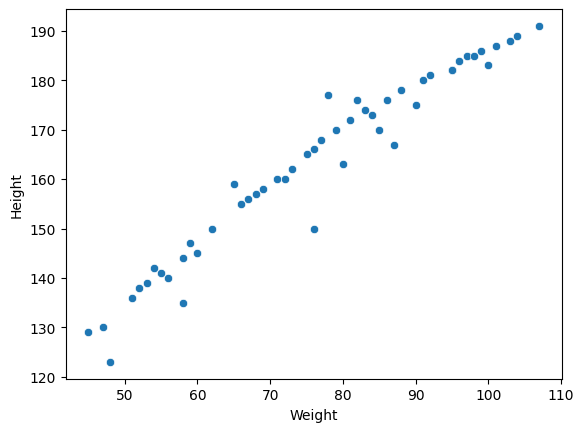

In [163]:
# Visualise the train data
sns.scatterplot(x=X_train, y=y_train)

In [164]:
# train the model

from sklearn.svm import SVR
svr = SVR(kernel='linear', epsilon=5)
X_train = np.array(X_train).reshape(len(X_train), 1)
svr.fit(X_train, y_train)

SVR(epsilon=5, kernel='linear')

In [165]:
# get prediction

X_test = np.array(X_test).reshape(len(X_test), 1)
y_pred = svr.predict(X_test)
y_pred

array([194.88679245, 132.54716981, 154.81132075, 163.71698113,
       148.13207547, 180.41509434, 159.26415094, 163.71698113,
       175.96226415, 193.77358491, 140.33962264, 190.43396226,
       197.11320755, 126.98113208, 144.79245283, 147.01886792,
       131.43396226])

In [166]:
# check r² score

from sklearn.metrics import r2_score

r2_score(y_pred, y_test)


0.9234427347698353

In [167]:
X_train = X_train.reshape(1, 51)
X_train[0]

array([ 90,  96,  71,  81,  87, 103,  75,  47,  68, 100,  97,  91,  60,
        65,  77,  95, 101,  80,  67, 104,  78,  62,  59,  54, 107,  95,
        73,  99,  51,  83,  66,  98,  58,  58,  56,  48,  92,  88,  79,
        55,  52,  76,  82,  72,  76,  69,  86,  45,  84,  85,  53],
      dtype=int64)

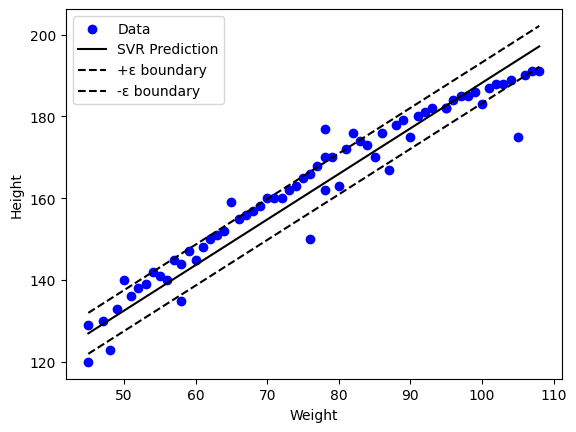

In [168]:
# seeing the hyperplane and marginal planes
sns.scatterplot(x=X_train[0], y=y_train)

# coefficients
w = svr.coef_[0][0]   # single weight
b = svr.intercept_[0]

# input range
xx = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# prediction line
yy = w * xx + b

# epsilon tube
yy_upper = yy + svr.epsilon
yy_lower = yy - svr.epsilon

# plot
plt.scatter(X, y, color='blue', label="Data")
plt.plot(xx, yy, 'k-', label="SVR Prediction")
plt.plot(xx, yy_upper, 'k--', label="+ε boundary")
plt.plot(xx, yy_lower, 'k--', label="-ε boundary")

plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.show()